In [3]:
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time 
import pandas as pd

In [4]:
# set ChromeOptions and number of page
options = webdriver.ChromeOptions()
prefs = {
    'profile.default_content_setting_values' :
        {
        'notifications' : 2
         }
}
options.add_experimental_option('prefs',prefs)
options.add_experimental_option("useAutomationExtension", False)
options.add_experimental_option('excludeSwitches', ['enable-automation'])

chromedriver = 'chromedriver.exe'
pages = 200

options.set_capability("UNEXPECTED_ALERT_BEHAVIOUR", "ACCEPT")
options.set_capability("unexpectedAlertBehaviour", "accept")
options.set_capability("CapabilityType.UNEXPECTED_ALERT_BEHAVIOUR", "ACCEPT")
options.set_capability("UnexpectedAlertBehaviour", "ACCEPT")

In [5]:
# get 591 data 
price = []
area = []
kind = []
space = []
floor = []
top_floor = []
mrt = []
bd = []
pet = []
elevator = []
parking = []
balcony = []

chromedriver = 'chromedriver.exe' 
driver = webdriver.Chrome(chromedriver, chrome_options = options)
actions = ActionChains(driver)
driver.get('https://rent.591.com.tw/?region=1')
driver.implicitly_wait(20)
driver.maximize_window()
time.sleep(5)

driver.find_element(By.CLASS_NAME, "statement-confirm").click()

for page in range(0, pages):
    
    time.sleep(1)
    
    for _ in range(0, 13):
        time.sleep(1)
        actions.send_keys(Keys.SPACE).perform() 
        
    time.sleep(3)
    items = driver.find_elements(By.CLASS_NAME, "rent-item-right")
    # print(driver.current_url)
    for _ in items:

        item = _.text.split("\n")
        # print(item)
        if len(item) == 7:
            price.append(item[6])
        elif len(item) == 6:
            price.append(item[5])
        else :
            price.append("急租")
            
    
        area_info = item[3].split(" ")
        area.append(area_info[len(area_info)-1].split("-")[0])
        
        # if len(area_info)==1:
        #     area.append(area_info[0].split("-")[0])
        # else :
        #     area.append(area_info[1].split("-")[0])

        if "近捷運" in item[1]:
            mrt.append(1)
        else :
            mrt.append(0)

        if "近商圈" in item[1]:
            bd.append(1)
        else :
            bd.append(0)

        if "可養寵物" in item[1]:
            pet.append(1)
        else :
            pet.append(0)

        if "有電梯" in item[1]:
            elevator.append(1)
        else :
            elevator.append(0)

        if "有車位" in item[1]:
            parking.append(1)
        else :
            parking.append(0)

        if "有陽台" in item[1]:
            balcony.append(1)
        else :
            balcony.append(0)

        if "F" in item[2]:
            
            style_info = item[2].split(" ")
            kind.append(style_info[0])
            if len(style_info) == 4:
                f = style_info[3].split("/")
                floor.append(f[0])
                top_floor.append(f[1])
                space.append(style_info[2])

            elif len(style_info) == 3:
                f = style_info[2].split("/")
                floor.append(f[0])
                top_floor.append(f[1])
                space.append(style_info[1])
                
            else : 
                del price[-1]
                del area[-1]
                del mrt[-1]
                del bd[-1]
                del pet[-1]
                del elevator[-1]
                del parking[-1]
                del balcony[-1]
                
        else :
            del price[-1]
            del area[-1]
            del mrt[-1]
            del bd[-1]
            del pet[-1]
            del elevator[-1]
            del parking[-1]
            del balcony[-1]

        
    time.sleep(1)
    driver.find_element(By.CLASS_NAME, "pageNext").click()
    
    



/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_57517/4196400190.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver, chrome_options = options)
/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_57517/4196400190.py:16: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options = options)


In [62]:
# save data with csv and create a dataframe
data = {"kind":kind
        ,"area":area
        ,"space":space
        ,"floor":floor
        ,"top_floor":top_floor
        ,"mrt":mrt 
        ,"bd":bd
        ,"pet":pet
        ,"elevator":elevator
        ,"parking":parking
        ,"balcony":balcony
        ,"price":price
       }
df = pd.DataFrame(data = data)
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9坪,10F,12F,1,1,0,1,0,0,"30,000元/月"
1,雅房,中山區,5坪,2F,5F,1,0,0,0,0,1,"12,800元/月"
2,整層住家,中山區,13坪,7F,13F,1,0,0,1,0,0,"19,000元/月"
3,整層住家,中山區,15坪,5F,11F,1,0,0,1,0,0,"32,500元/月"
4,整層住家,中山區,20.2坪,6F,7F,1,1,0,1,0,0,"35,999元/月"
...,...,...,...,...,...,...,...,...,...,...,...,...
5829,整層住家,信義區,35.9坪,3F,3F,1,1,0,0,0,0,"25,000元/月"
5830,整層住家,士林區,134.4坪,1F,12F,0,1,0,1,0,0,"200,000元/月"
5831,整層住家,中山區,120.7坪,2F,10F,1,1,0,1,0,0,"180,000元/月"
5832,整層住家,內湖區,79坪,2F,8F,1,1,0,1,0,0,"128,000元/月"


In [63]:
# df.to_csv("tp_Rent_591.csv", index=False)

In [64]:
df = pd.read_csv("tp_Rent_591.csv")
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9坪,10F,12F,1,1,0,1,0,0,"30,000元/月"
1,雅房,中山區,5坪,2F,5F,1,0,0,0,0,1,"12,800元/月"
2,整層住家,中山區,13坪,7F,13F,1,0,0,1,0,0,"19,000元/月"
3,整層住家,中山區,15坪,5F,11F,1,0,0,1,0,0,"32,500元/月"
4,整層住家,中山區,20.2坪,6F,7F,1,1,0,1,0,0,"35,999元/月"
...,...,...,...,...,...,...,...,...,...,...,...,...
5829,整層住家,信義區,35.9坪,3F,3F,1,1,0,0,0,0,"25,000元/月"
5830,整層住家,士林區,134.4坪,1F,12F,0,1,0,1,0,0,"200,000元/月"
5831,整層住家,中山區,120.7坪,2F,10F,1,1,0,1,0,0,"180,000元/月"
5832,整層住家,內湖區,79坪,2F,8F,1,1,0,1,0,0,"128,000元/月"


In [65]:
space_del_str = "坪"
df["space"] = df["space"].str.replace("坪","")
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9,10F,12F,1,1,0,1,0,0,"30,000元/月"
1,雅房,中山區,5,2F,5F,1,0,0,0,0,1,"12,800元/月"
2,整層住家,中山區,13,7F,13F,1,0,0,1,0,0,"19,000元/月"
3,整層住家,中山區,15,5F,11F,1,0,0,1,0,0,"32,500元/月"
4,整層住家,中山區,20.2,6F,7F,1,1,0,1,0,0,"35,999元/月"
...,...,...,...,...,...,...,...,...,...,...,...,...
5829,整層住家,信義區,35.9,3F,3F,1,1,0,0,0,0,"25,000元/月"
5830,整層住家,士林區,134.4,1F,12F,0,1,0,1,0,0,"200,000元/月"
5831,整層住家,中山區,120.7,2F,10F,1,1,0,1,0,0,"180,000元/月"
5832,整層住家,內湖區,79,2F,8F,1,1,0,1,0,0,"128,000元/月"


In [66]:
floor_del_str = "F"
df["floor"] = df["floor"].str.replace("F","")

top_floor_del_str = "F"
df["top_floor"] = df["top_floor"].str.replace("F","")


price_del_str = "元/月"
df["price"] = df["price"].str.replace("元/月","")
price_del_str = ","
df["price"] = df["price"].str.replace(",","")


df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9,10,12,1,1,0,1,0,0,30000
1,雅房,中山區,5,2,5,1,0,0,0,0,1,12800
2,整層住家,中山區,13,7,13,1,0,0,1,0,0,19000
3,整層住家,中山區,15,5,11,1,0,0,1,0,0,32500
4,整層住家,中山區,20.2,6,7,1,1,0,1,0,0,35999
...,...,...,...,...,...,...,...,...,...,...,...,...
5829,整層住家,信義區,35.9,3,3,1,1,0,0,0,0,25000
5830,整層住家,士林區,134.4,1,12,0,1,0,1,0,0,200000
5831,整層住家,中山區,120.7,2,10,1,1,0,1,0,0,180000
5832,整層住家,內湖區,79,2,8,1,1,0,1,0,0,128000


In [67]:
df["kind"] = df["kind"].astype("category")
df["area"] = df["area"].astype("category")
df["space"] = df["space"].astype("float64")
df["top_floor"] = df["top_floor"].astype("int64")

df.dtypes

kind         category
area         category
space         float64
floor          object
top_floor       int64
mrt             int64
bd              int64
pet             int64
elevator        int64
parking         int64
balcony         int64
price          object
dtype: object

In [68]:
df[df["price"]=="急租"]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
325,獨立套房,萬華區,6.0,1,4,1,0,0,0,0,0,急租
372,獨立套房,萬華區,6.0,1,4,1,0,0,0,0,0,急租
437,獨立套房,萬華區,6.0,1,4,1,0,0,0,0,0,急租
537,雅房,萬華區,6.0,4,4,0,0,0,0,0,1,急租
575,整層住家,大安區,11.0,6,14,1,0,0,1,0,0,急租
605,獨立套房,中正區,8.0,10,11,1,1,1,0,0,0,急租
971,整層住家,大安區,60.0,4,4,1,1,0,0,0,0,急租
1050,分租套房,大安區,8.0,4,6,1,0,1,0,0,0,急租
1210,獨立套房,北投區,16.0,3,5,1,0,0,0,0,1,急租
1263,獨立套房,北投區,16.0,3,5,1,0,0,0,0,1,急租


In [69]:
# 刪除急租資料，由於其在網站上降價幅度特別大，因此視為離群值，將其刪除
filter_price = df["price"]=="急租"
df = df[~filter_price]
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9,10,12,1,1,0,1,0,0,30000
1,雅房,中山區,5.0,2,5,1,0,0,0,0,1,12800
2,整層住家,中山區,13.0,7,13,1,0,0,1,0,0,19000
3,整層住家,中山區,15.0,5,11,1,0,0,1,0,0,32500
4,整層住家,中山區,20.2,6,7,1,1,0,1,0,0,35999
...,...,...,...,...,...,...,...,...,...,...,...,...
5829,整層住家,信義區,35.9,3,3,1,1,0,0,0,0,25000
5830,整層住家,士林區,134.4,1,12,0,1,0,1,0,0,200000
5831,整層住家,中山區,120.7,2,10,1,1,0,1,0,0,180000
5832,整層住家,內湖區,79.0,2,8,1,1,0,1,0,0,128000


In [70]:
df["price"] = df["price"].astype("int64")
df.dtypes

/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_57517/1195682911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"] = df["price"].astype("int64")


kind         category
area         category
space         float64
floor          object
top_floor       int64
mrt             int64
bd              int64
pet             int64
elevator        int64
parking         int64
balcony         int64
price           int64
dtype: object

In [71]:
df["floor"].value_counts()

3        884
4        803
2        795
5        781
6        381
1        369
7        282
頂樓加蓋     262
8        251
11       174
9        171
10       155
12       109
整棟        62
15        56
14        51
13        50
B1        41
16        41
18        14
17        13
19         9
1~2        6
4~5        4
26         3
23         2
21         2
6~7        2
2~3        2
1~3        2
22         1
15~16      1
9~16       1
10~11      1
1~4        1
24         1
12~13      1
Name: floor, dtype: int64

In [72]:
# 刪除floor 為“多層樓”或“地下室”或”頂樓加蓋“的資料
filter1 = df["floor"].str.contains("~")
filter2 = df["floor"].str.contains("整棟")
filter3 = df["floor"].str.contains("頂樓加蓋")
filter4 = df["floor"].str.contains("B")

df = df.loc[~(filter1 | filter2 | filter3 | filter4)]
df.reset_index(drop=True, inplace = True)

df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9,10,12,1,1,0,1,0,0,30000
1,雅房,中山區,5.0,2,5,1,0,0,0,0,1,12800
2,整層住家,中山區,13.0,7,13,1,0,0,1,0,0,19000
3,整層住家,中山區,15.0,5,11,1,0,0,1,0,0,32500
4,整層住家,中山區,20.2,6,7,1,1,0,1,0,0,35999
...,...,...,...,...,...,...,...,...,...,...,...,...
5393,整層住家,信義區,35.9,3,3,1,1,0,0,0,0,25000
5394,整層住家,士林區,134.4,1,12,0,1,0,1,0,0,200000
5395,整層住家,中山區,120.7,2,10,1,1,0,1,0,0,180000
5396,整層住家,內湖區,79.0,2,8,1,1,0,1,0,0,128000


In [73]:
df["floor"] = df["floor"].astype("int64")
df.dtypes

/var/folders/j9/m4lgqs1n4555tzqjypnf73d80000gn/T/ipykernel_57517/85766373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["floor"] = df["floor"].astype("int64")


kind         category
area         category
space         float64
floor           int64
top_floor       int64
mrt             int64
bd              int64
pet             int64
elevator        int64
parking         int64
balcony         int64
price           int64
dtype: object

In [74]:
df.kind.value_counts()

整層住家    3036
獨立套房    1478
分租套房     406
雅房       315
其他       163
Name: kind, dtype: int64

In [75]:
# 刪除租屋類型為"其他"的樣本，因其涵蓋範圍太廣，包含看板出租、店面出租、短期租約等等內容
(df["kind"]=="其他").sum()

163

In [76]:
filter_kind = df["kind"]=="其他"
df = df[~filter_kind]
df.reset_index(drop=True, inplace = True)

In [77]:
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9,10,12,1,1,0,1,0,0,30000
1,雅房,中山區,5.0,2,5,1,0,0,0,0,1,12800
2,整層住家,中山區,13.0,7,13,1,0,0,1,0,0,19000
3,整層住家,中山區,15.0,5,11,1,0,0,1,0,0,32500
4,整層住家,中山區,20.2,6,7,1,1,0,1,0,0,35999
...,...,...,...,...,...,...,...,...,...,...,...,...
5230,整層住家,信義區,35.9,3,3,1,1,0,0,0,0,25000
5231,整層住家,士林區,134.4,1,12,0,1,0,1,0,0,200000
5232,整層住家,中山區,120.7,2,10,1,1,0,1,0,0,180000
5233,整層住家,內湖區,79.0,2,8,1,1,0,1,0,0,128000


In [79]:
# df.to_csv("tp_cleaned_Rent_591.csv", index=False)

In [80]:
df.iloc[[4507],]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
4507,獨立套房,中山區,6.0,4,4,1,1,0,0,0,0,18000


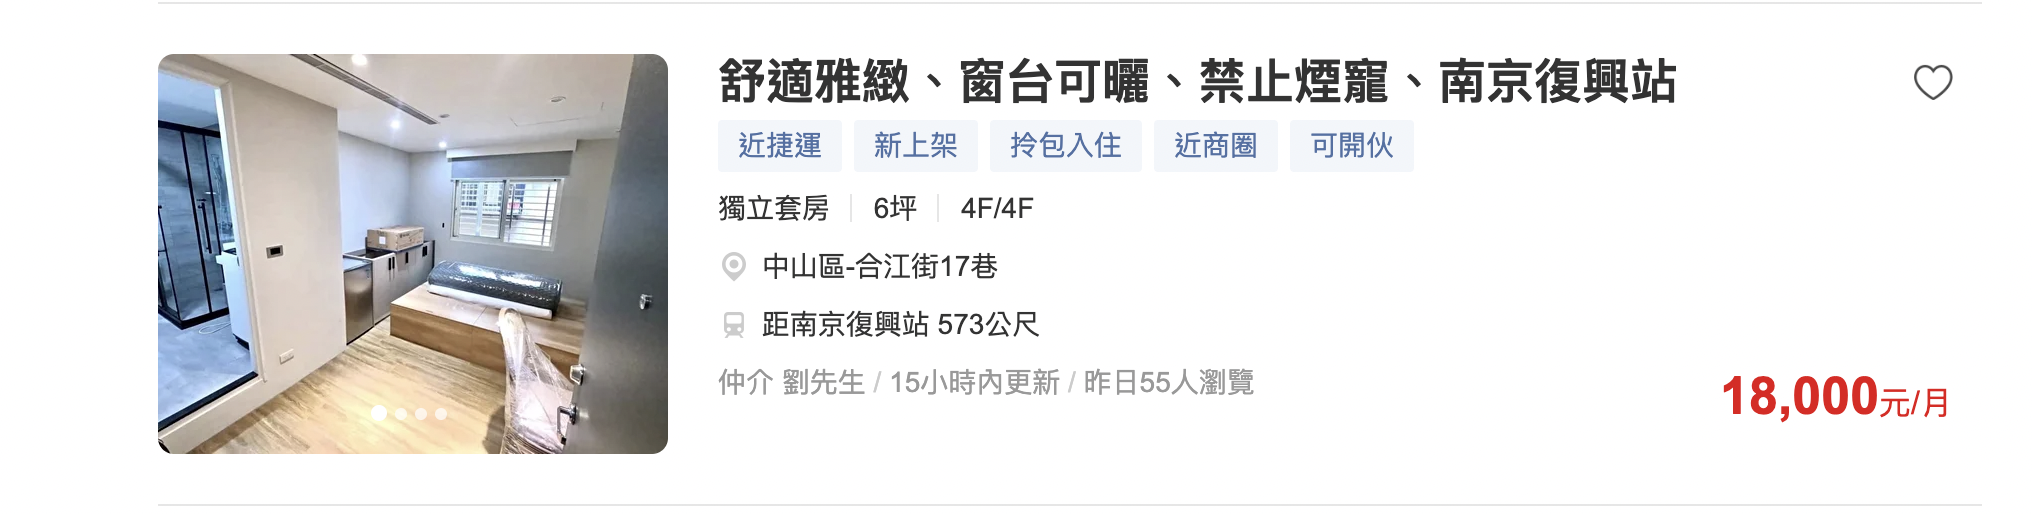

In [1]:
# 隨機抽取資料，驗證資料是否抓取有誤
from IPython.display import Image
Image(filename=('./tp_4507.png'),width=500)

In [81]:
df.iloc[[1490],]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
1490,獨立套房,南港區,6.0,6,6,0,1,0,1,0,0,22000


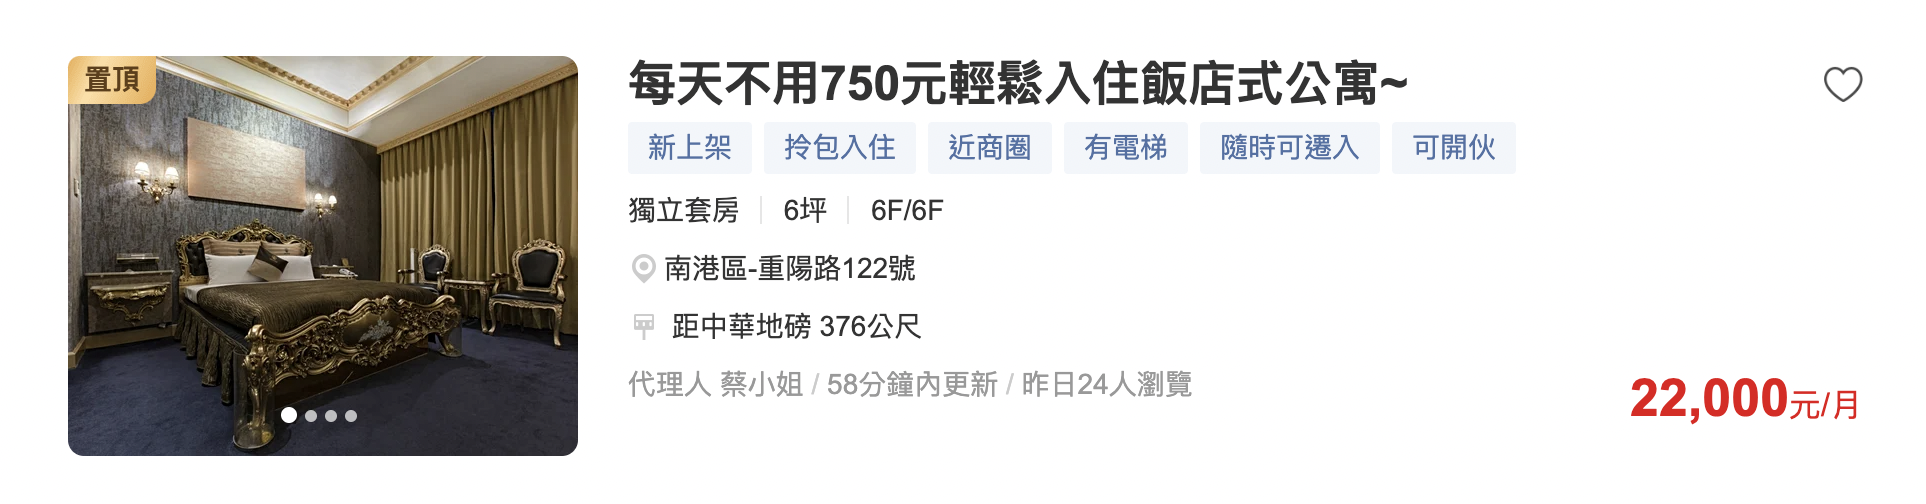

In [2]:
Image(filename=('./tp_1490.png'),width=500)

In [82]:
df.iloc[[3756],]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
3756,整層住家,大安區,9.0,3,9,1,0,1,1,0,0,24500


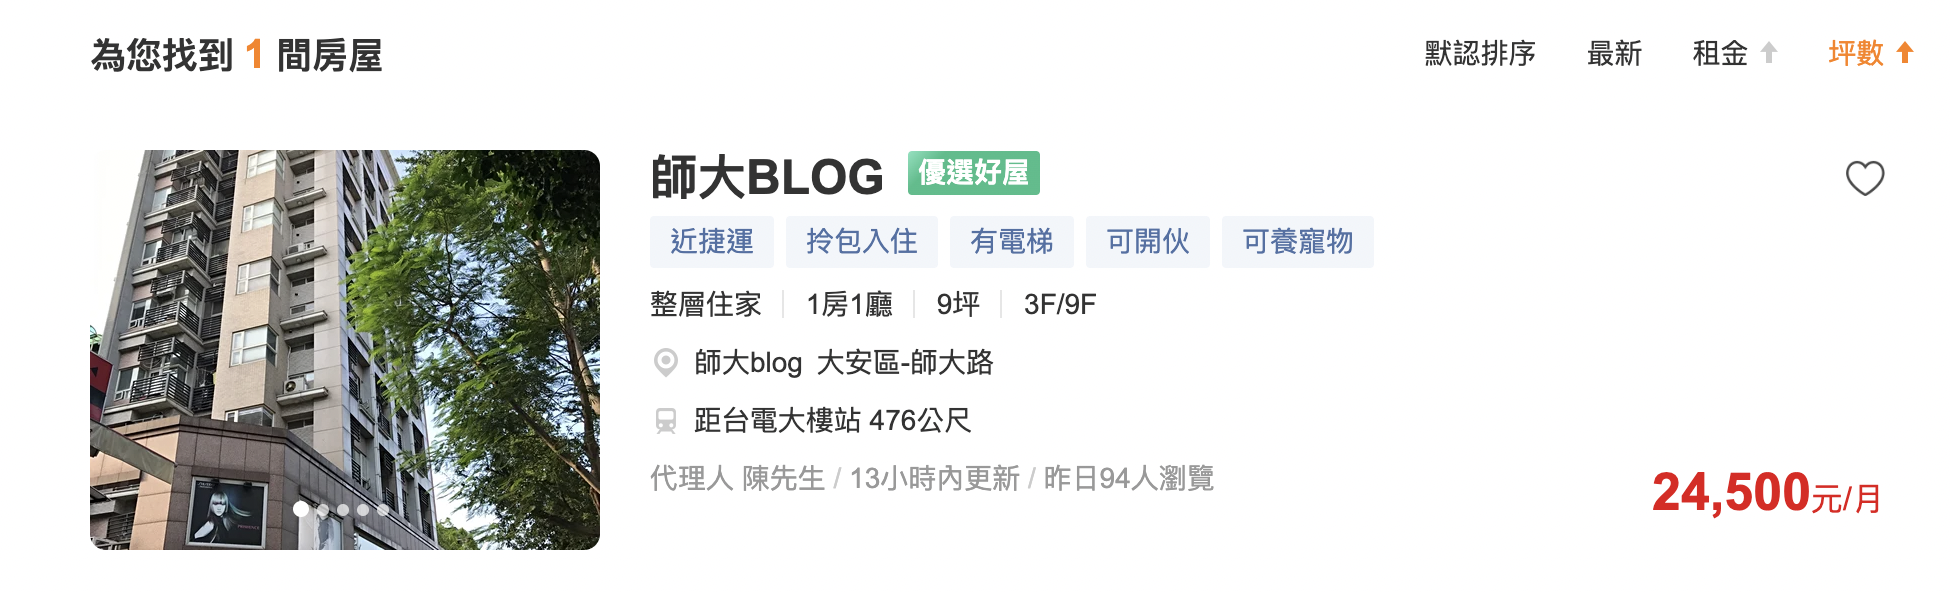

In [3]:
Image(filename=('./tp_3756.png'),width=500)

In [85]:
# 觀察重複被刊登的租屋
df[df.duplicated(subset=None, keep='first')]

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
9,獨立套房,中山區,10.0,4,4,1,0,0,0,0,0,16998
28,整層住家,大同區,25.0,3,4,1,1,0,0,0,0,33000
58,整層住家,信義區,25.8,2,4,1,1,1,0,0,0,33000
72,整層住家,信義區,9.7,2,5,1,1,0,1,0,0,27999
73,獨立套房,信義區,9.7,2,5,1,1,0,1,0,0,27999
...,...,...,...,...,...,...,...,...,...,...,...,...
5184,整層住家,信義區,25.8,2,4,1,0,1,0,0,0,33000
5207,整層住家,大同區,31.5,2,5,1,1,0,0,0,0,45000
5212,整層住家,南港區,104.2,11,21,1,1,0,1,0,0,135000
5227,整層住家,大安區,21.2,4,10,1,1,0,1,0,0,42000


In [87]:
# 刪除重複值
df = df.drop_duplicates()
df.reset_index(drop=True, inplace = True)
df

,kind,area,space,floor,top_floor,mrt,bd,pet,elevator,parking,balcony,price
0,整層住家,中山區,12.9,10,12,1,1,0,1,0,0,30000
1,雅房,中山區,5.0,2,5,1,0,0,0,0,1,12800
2,整層住家,中山區,13.0,7,13,1,0,0,1,0,0,19000
3,整層住家,中山區,15.0,5,11,1,0,0,1,0,0,32500
4,整層住家,中山區,20.2,6,7,1,1,0,1,0,0,35999
...,...,...,...,...,...,...,...,...,...,...,...,...
4360,整層住家,大安區,103.3,3,14,1,1,0,1,0,0,150000
4361,整層住家,信義區,35.9,3,3,1,1,0,0,0,0,25000
4362,整層住家,士林區,134.4,1,12,0,1,0,1,0,0,200000
4363,整層住家,內湖區,79.0,2,8,1,1,0,1,0,0,128000


In [88]:
# df.to_csv("tp_cleaned_Rent_591.csv", index=False)

In [93]:
df["kind"].value_counts()

整層住家    2507
獨立套房    1219
分租套房     362
雅房       277
其他         0
Name: kind, dtype: int64